In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('IndiaAffectedWaterQualityAreas.csv', encoding= 'windows-1252')
data.head()

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [3]:
#waht is the highest quality paramter.

zoom = data.groupby('Quality Parameter').size()
x = zoom.values
y = zoom.index

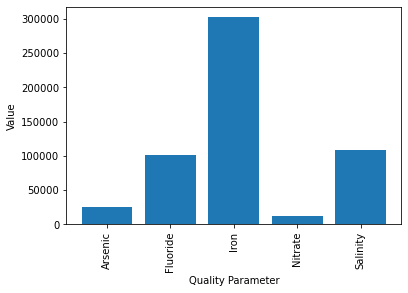

In [4]:
plt.bar(y, x)
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.xlabel('Quality Parameter')
plt.show()

In [5]:
#what states are the most data from

zoom_1 = data.groupby('State Name').size().sort_values(ascending=False)
q = zoom_1.values
p = zoom_1.index

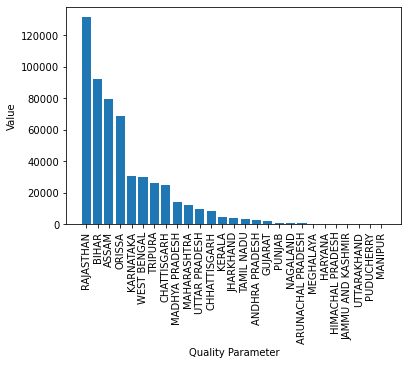

<Figure size 1440x720 with 0 Axes>

In [6]:
plt.bar(p, q)
plt.xticks(rotation='vertical')
plt.ylabel('Value')
plt.xlabel('Quality Parameter')
plt.figure(figsize=(20,10))
plt.show()

In [7]:
data['Quality Parameter'].groupby(data['State Name']).describe().sort_values(by='count', ascending=False)

,count,unique,top,freq
State Name,,,,
RAJASTHAN,131417,5,Salinity,87137
BIHAR,92336,4,Iron,69970
ASSAM,79910,3,Iron,74098
ORISSA,68620,5,Iron,59905
KARNATAKA,30824,5,Fluoride,13156
WEST BENGAL,30101,4,Arsenic,12382
TRIPURA,26235,1,Iron,26235
CHATTISGARH,25062,5,Iron,24439
MADHYA PRADESH,14449,4,Fluoride,12762


In [8]:
# I am using Bihar fior this case study

data_1= data[data['State Name']=='BIHAR'].reset_index()
data_1.head()

,index,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,19598,BIHAR,GAYA,AMAS,KALWAN,ALWADI CHAK,ALWADICHAK,Fluoride,1/4/2009
1,19599,BIHAR,GAYA,AMAS,SAWON KALA,SHAMSHER KHAP,SHAMSHER KHAP,Fluoride,1/4/2009
2,19600,BIHAR,GAYA,AMAS,SAWON KALA,SHAMSHER KHAP,PURBARI TOLA,Fluoride,1/4/2009
3,19601,BIHAR,GAYA,AMAS,SAWON KALA,SHAMSHER KHAP,HARIJAN TOLA,Fluoride,1/4/2009
4,19602,BIHAR,GAYA,AMAS,SAWON KALA,SHAMSHER KHAP,BICH TOLA,Fluoride,1/4/2009


In [9]:
#what has the most water quality parameter in Bihar??
'''The highest is Iron and the least is Nitrate'''

data_1['Quality Parameter'].value_counts()

Iron        69970
Fluoride    16150
Arsenic      6215
Nitrate         1
Name: Quality Parameter, dtype: int64

Text(0.5, 1.0, 'Water Quality Parameter in Bihar')

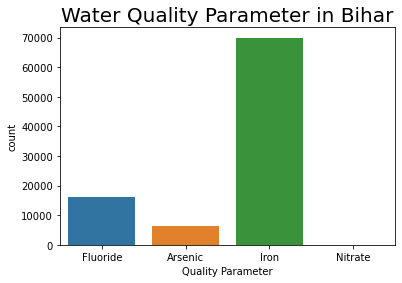

In [10]:
sns.countplot(data_1['Quality Parameter'])
plt.title('Water Quality Parameter in Bihar', size=20)

In [11]:
#where are most records in Bihar obtained??
'''The highest is from SUPAL and the least from DARBHANGA'''

data_1['District Name'].value_counts()

SUPAUL             12607
PURNIA             11845
BANKA               9743
SAHARSA             8746
BEGUSARAI           8718
ARARIA              7370
KISHANGANJ          6540
MADHEPURA           6000
JAMUI               3952
KATIHAR             3063
MUNGER              2564
BHAGALPUR           2029
KHAGARIA            1533
BUXAR               1312
LAKHISARAI           832
GAYA                 811
NALANDA              806
ROHTAS               757
SHEIKHPURA           751
SAMASTIPUR           644
NAWADA               324
AURANGABAD           321
PATNA                281
VAISHALI             270
KAIMUR (BHABUA)      194
BHOJPUR(AARA)        174
SARAN                129
DARBHANGA             20
Name: District Name, dtype: int64

In [13]:
data_1['Year']= pd.to_datetime(data_1['Year'])
data_1['Year']= data_1['Year'].dt.year

In [14]:
data_1['Year'].value_counts()

2009    34909
2010    24420
2011    18427
2012    14580
Name: Year, dtype: int64

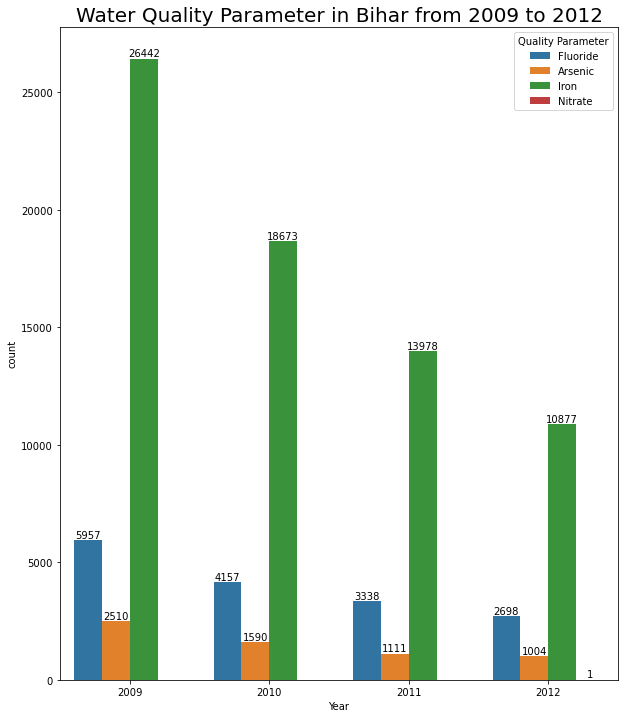

In [17]:
plt.figure(figsize=(10,12))
ax= sns.countplot(data_1['Year'], hue=data_1['Quality Parameter'])
ax.bar_label(ax.containers[0]);
ax.bar_label(ax.containers[1]);
ax.bar_label(ax.containers[2]);
ax.bar_label(ax.containers[3]);
plt.title('Water Quality Parameter in Bihar from 2009 to 2012', size=20);